<a href="https://colab.research.google.com/github/carlaolivei/EDA/blob/main/detectando_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [364]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [365]:
lista_1 = [24, 25, 28, 30, 31, 36]
print('Média da lista_1:', np.mean(lista_1))
print('Desvio padrão da lista_1:', np.std(lista_1))
print ('Coeficiente de variação da lista_1:', np.std(lista_1)/np.mean(lista_1))

Média da lista_1: 29.0
Desvio padrão da lista_1: 4.0
Coeficiente de variação da lista_1: 0.13793103448275862


In [367]:
lista_2 = [24, 25, 28, 30, 31, 104]
print('Média da lista_2:', np.mean(lista_2))
print('Desvio padrão da lista_2:', np.std(lista_2))
print ('Coeficiente de variação da lista_2:', np.std(lista_2)/np.mean(lista_2))

Média da lista_2: 40.333333333333336
Desvio padrão da lista_2: 28.581268146968025
Coeficiente de variação da lista_2: 0.7086264829826783


In [ ]:
from google.colab import files
uploaded = files.upload()
print ('Upload concluído com suceoo!')

Saving Canada.xlsx to Canada (1).xlsx
Upload concluído com suceoo!


In [368]:
df_canada = pd.read_excel('/content/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [369]:
# Leitura das 5 primeiras linhas
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [370]:
# Verificação das dimensões do dataset (quantidade de linhas e colunas)
df_canada.shape

(195, 43)

In [371]:
# Limpeza dos dados que não são necessários
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'DevName'], axis=1, inplace=True)
df_canada.head()

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [372]:
# Padronização dos nomes das colunas que serão utilizadas
df_canada.rename(columns={'OdName':'Pais', 'AreaName':'Continente','RegName':'Região'}, inplace=True)
df_canada.head()

,Pais,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [373]:
# Verificar se todos os rótulos das colunas são do tipo string e caso não seja transformá-los
df_canada.columns = list(map(str, df_canada.columns))
all(isinstance(column, str) for column in df_canada.columns)

True

In [374]:
# Definir o nome do país como índice. Isso é útil para pesquisar países mais rapidamente usando o método .loc.
df_canada.set_index('Pais', inplace=True)
df_canada.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [375]:
# criar uma lista de anos de 1980 a 2013. Isso será útil para plotar os dados
anos = list(map(str, range(1980, 2014)))

In [376]:
# Criação de um subconjunto com os dados do Brasil
df_brasil = df_canada.loc[['Brazil'], anos] # passando nos anos 1980 - 2013
df_brasil.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Brazil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714


In [377]:
# Trocar as linhas e colunas
df_brasil = df_brasil.transpose()
df_brasil.head()

Pais,Brazil
1980,211
1981,220
1982,192
1983,139
1984,145


<h3>Box Plots</h3>

Um box plot é uma forma de representar estatisticamente a _distribuição_ dos dados por meio de cinco dimensões principais:

- **Minimun:** menor número no conjunto de dados.
- **First quartile:** número médio entre o `mínimo` e a` mediana`.
- **Second quartile (Median):** úmero do meio do conjunto de dados (mediana).
- **Third quartile:** número médio entre `mediana` e` máximo`.
- **Maximum:** número mais alto no conjunto de dados.

Observe como o box plot examina os dados e identifica os outliers. Para ser um outlier, o valor dos dados deve ser:

**Maior** do que Q3 em pelo menos 1,5 vezes a Distância Interquartílica (DIQ) ou

Q3 + 1,5 * DIQ

**Menor** que Q1 em pelo menos 1,5 vezes a Distância Interquartílica (DIQ).

Q1 - 1,5 * DIQ



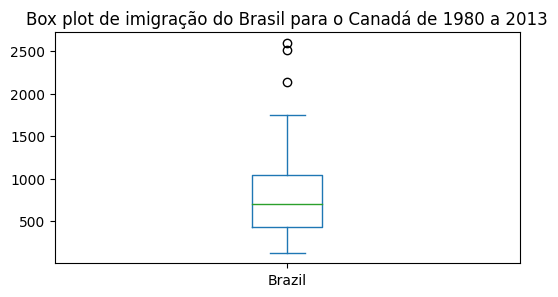

In [378]:
df_brasil.plot(kind='box', figsize=(6, 3))
plt.title('Box plot de imigração do Brasil para o Canadá de 1980 a 2013')
plt.show()

In [ ]:
#Utilizando método describe do Pandas parar gerar medidas
#da estatística descritiva
df_brasil.describe()

Pais,Brazil
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


In [379]:
def dectecta_outliers(df):
  estatistica_descritiva = df.describe()
  Q1 = estatistica_descritiva.loc['25%']
  Q3 = estatistica_descritiva.loc['75%']
  DIQ = Q3 - Q1
  limite_inferior = (DIQ * 1.5) - Q1
  limite_superior = (DIQ * 1.5) + Q3
  print('DIQ:', DIQ)
  print('Limite inferior:', limite_inferior)
  print('Limite superior:', limite_superior)


In [380]:
dectecta_outliers(df_brasil)

DIQ: Pais
Brazil    613.5
dtype: float64
Limite inferior: Pais
Brazil    492.0
dtype: float64
Limite superior: Pais
Brazil    1962.0
dtype: float64


In [381]:
df_brasil[df_brasil['Brazil'] > 1962]

Pais,Brazil
2008,2138
2009,2509
2010,2598
